
## Polynomial Regression
#### Erin Moore

Created the following figure using matplotlib, which plots the data from the file called PolynomialRegressionData_II.csv
Performed a PolynomialFeatures transformation, then perform linear regression to calculate theoptimal ordinary least squares regression model parameters.
Recreated the first figure by adding the best fit curve to all subplots.
Infered the true model parameters.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Imported Data

Imported the data from the file called `PolynomialRegressionData_I.csv`.

In [2]:
import pandas as pd

PRD = pd.read_csv("PolynomialRegressionData_II.csv")
PRD

,x,y,z
0,-3.319120,-4.692237,-3397.468030
1,8.812980,9.128139,17492.040881
2,-19.995425,-19.149264,-169660.383385
3,-7.906697,-8.766213,-17145.826565
4,-14.129764,-13.779218,-63847.758980
...,...,...,...
145,-15.700235,-16.744824,-113760.620501
146,-10.971626,-8.920453,-18055.943866
147,8.519559,9.105221,17351.776523
148,2.388679,2.818205,-306.303994


In [3]:
x = PRD.x
y = PRD.y
z = PRD.z

# Created First Image 

Used the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Created four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

(-200000.0, 200000.0)

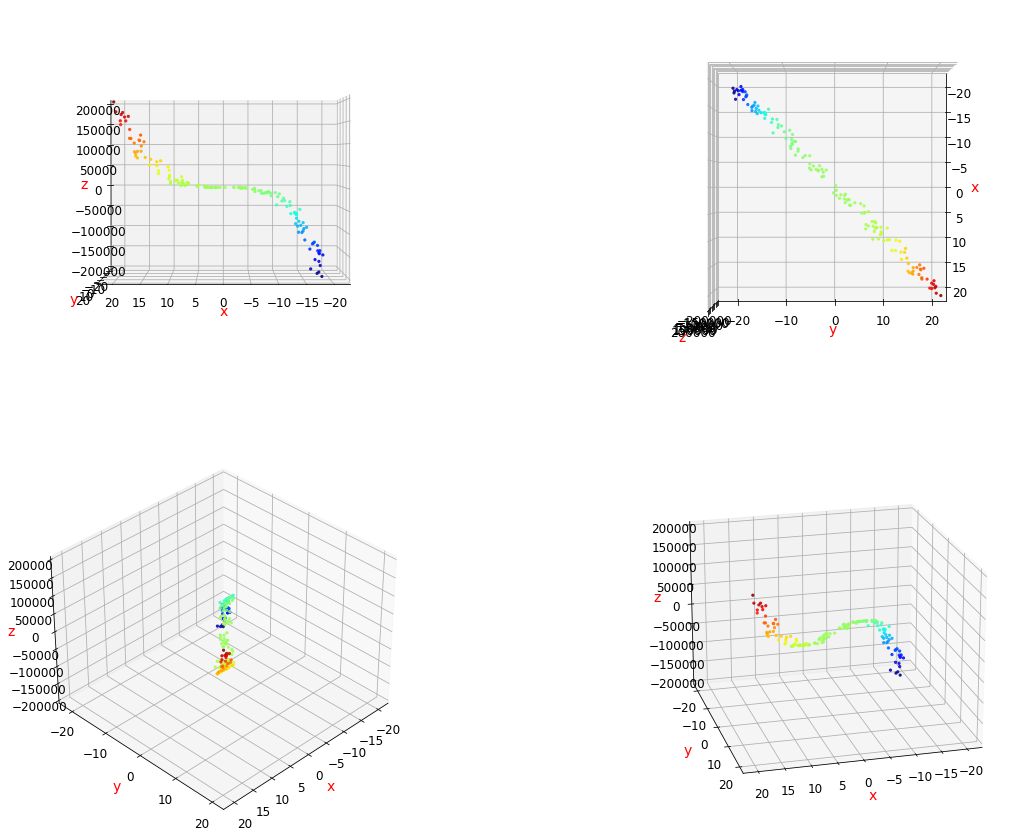

In [5]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
my_cmap = plt.get_cmap('jet')

fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(1,90)
ax1.scatter3D(x,y,z,
                  alpha = 0.8,
                  c = (x + y + z),
                  cmap = my_cmap,
                  marker ='.')
ax1.set_xlabel('x', color = 'red')
ax1.set_ylabel('y', color = 'red')
ax1.set_zlabel('z', color = 'red')
ax1.set_zlim([-200000,200000])

ax2 = fig.add_subplot(222, projection='3d')
ax2.view_init(90, 0)
ax2.scatter3D(x,y,z,
                  alpha = 0.8,
                  c = (x + y + z),
                  cmap = my_cmap,
                  marker ='.')
ax2.set_xlabel('x', color = 'red')
ax2.set_ylabel('y', color = 'red')
ax2.set_zlabel('z', color = 'red')
ax2.set_zlim([-200000,200000])

ax3 = fig.add_subplot(223, projection='3d')
ax3.view_init(35, 45)
ax3.scatter3D(x,y,z,
                  alpha = 0.8,
                  c = (x + y + z),
                  cmap = my_cmap,
                  marker ='.')
ax3.set_xlabel('x', color = 'red')
ax3.set_ylabel('y', color = 'red')
ax3.set_zlabel('z', color = 'red')
ax3.set_zlim([-200000,200000])

ax4 = fig.add_subplot(224, projection='3d')
ax4.view_init(20, 75)
ax4.scatter3D(x,y,z,
                  alpha = 0.8,
                  c = (x + y + z),
                  cmap = my_cmap,
                  marker ='.')
ax4.set_xlabel('x', color = 'red')
ax4.set_ylabel('y', color = 'red')
ax4.set_zlabel('z', color = 'red')
ax4.set_zlim([-200000,200000])

# Performed Polynomial Features Transformation

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias = False)
PRD_poly = poly_features.fit_transform(PRD[['x','y']])
PRD_poly

array([[-3.31911981e+00, -4.69223713e+00,  1.10165563e+01, ...,
        -5.16922947e+01, -7.30773573e+01, -1.03309404e+02],
       [ 8.81297974e+00,  9.12813913e+00,  7.76686119e+01, ...,
         7.08969895e+02,  7.34323241e+02,  7.60583243e+02],
       [-1.99954250e+01, -1.91492644e+01,  3.99817021e+02, ...,
        -7.65620183e+03, -7.33220889e+03, -7.02192658e+03],
       ...,
       [ 8.51955922e+00,  9.10522122e+00,  7.25828892e+01, ...,
         6.60883263e+02,  7.06314512e+02,  7.54868851e+02],
       [ 2.38867928e+00,  2.81820542e+00,  5.70578871e+00, ...,
         1.60800847e+01,  1.89715640e+01,  2.23829816e+01],
       [-1.94977608e+01, -2.01047592e+01,  3.80162676e+02, ...,
        -7.64307905e+03, -7.88102108e+03, -8.12637065e+03]])

# Trained Linear Regression Model

From the `sklearn.linear_model` library, imported the `LinearRegression` class.  Instantiated an object of this class called `model`, and fit it to the data. Printed the optimal model parameters to the screen by completing the following `print()` statements.

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(PRD_poly, PRD['z'])
print(f'w_x:{model.coef_[0]}, \nw_y : {model.coef_[1]} \nb : {model.intercept_}')

# will print each coef on separate lines


w_x:13.110496586470003, 
w_y : -0.12551237203696353 
b : -875.0064816929334


In [8]:
print("Computed Model Coefficients: ", f"{model.coef_.round()}")
print("Computed Model Intercept : ", f"{model.intercept_.round()}")

Computed Model Coefficients:  [13. -0. -0.  0. -0. -0.  0. -0. 24.]
Computed Model Intercept :  -875.0


# Created Second Image

Used the following `x_test` and `y_test` data to compute `z_test` by invoking the model's `predict()` method.  This allowed me to plot the line of best fit that is predicted by the model.

In [9]:
# Plotted Curve Fit
x_test = np.linspace(-21,21,1000)
y_test = x_test

data_test = poly_features.fit_transform(np.array([x_test, y_test]).T)
z_test = model.predict(data_test)

Recreated the first image, but plot the line of best fit in each of the subplots as well.

Text(0.5, 0, 'z')

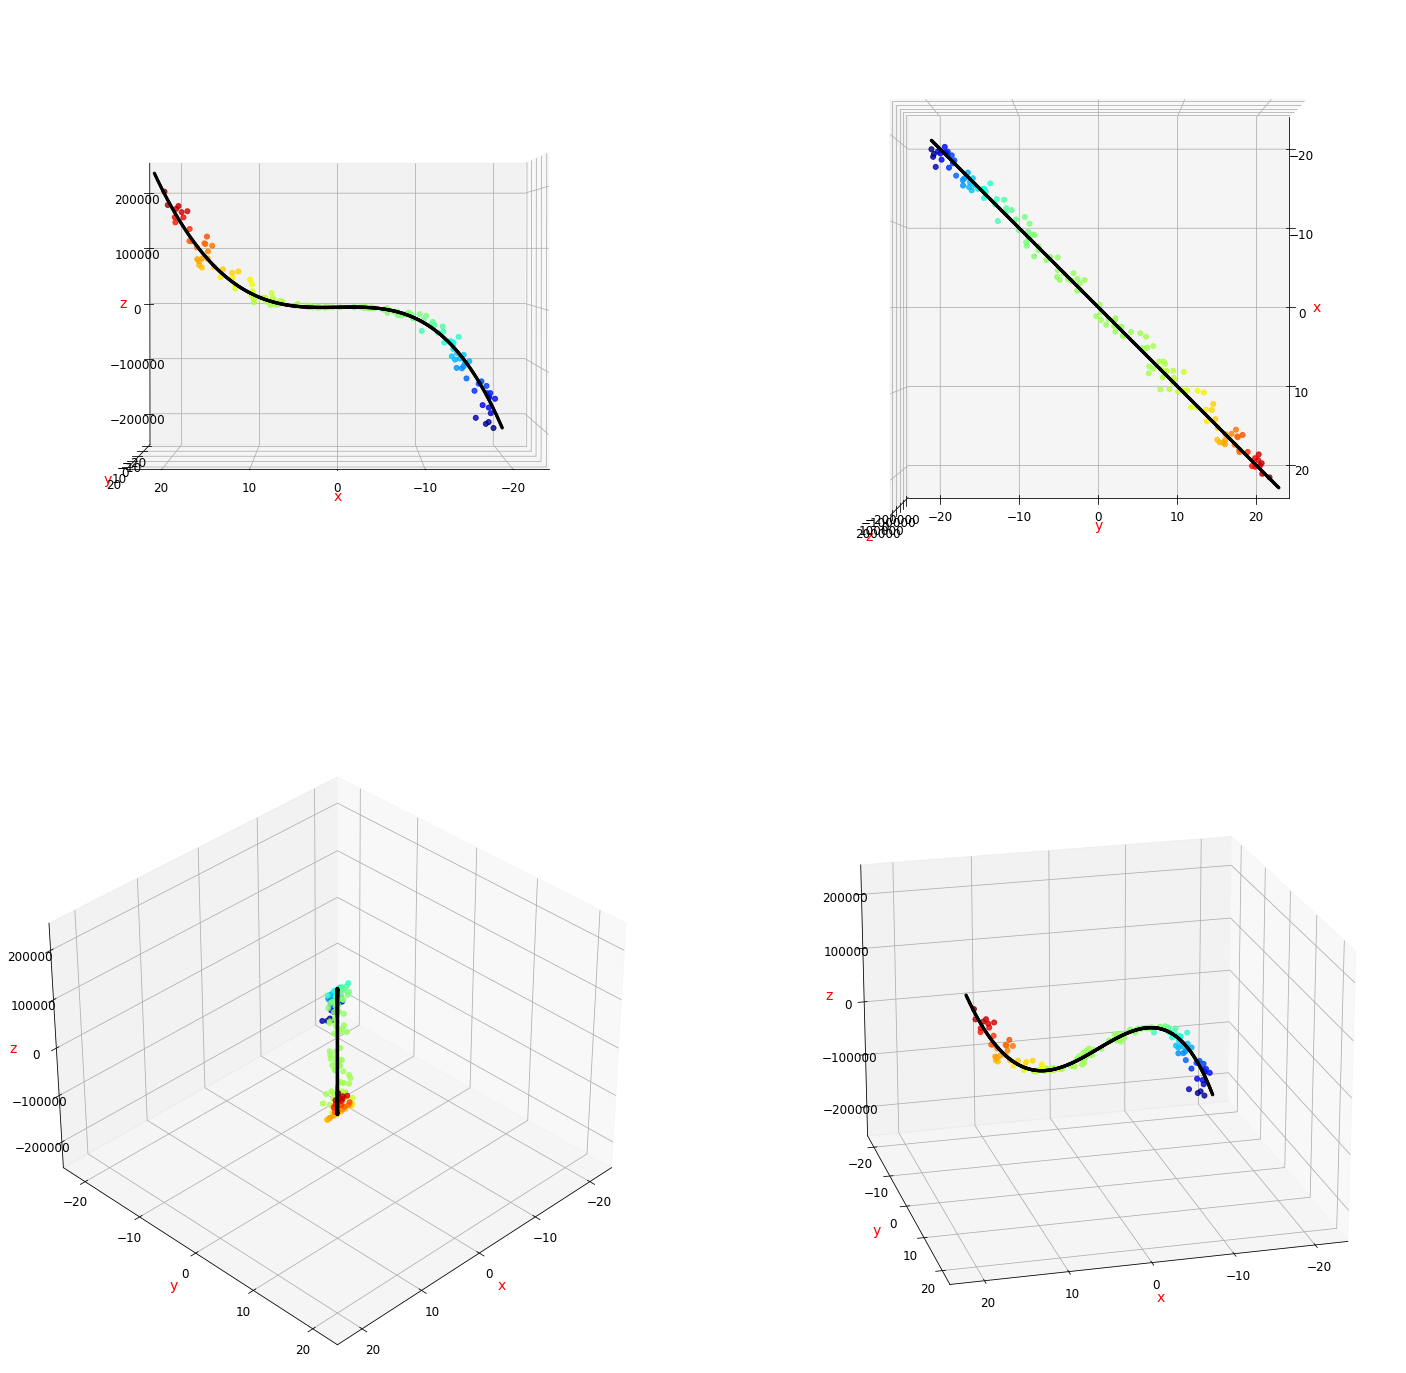

In [12]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
my_cmap = plt.get_cmap('jet')

fig = plt.figure(figsize = (25, 25))
ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(1, 90)
ax1.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='.',
                    s = 100)
ax1.scatter3D(x_test, y_test, z_test,
                     alpha = 0.8,
                     color = 'black',
                     marker = '.')
ax1.set_xlabel('x', color = 'red')
ax1.set_ylabel('y', color = 'red')
ax1.set_zlabel('z', color = 'red')


ax2 = fig.add_subplot(222, projection='3d')
ax2.view_init(90, 0)
ax2.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='.',
                    s = 100)
ax2.scatter3D(x_test, y_test, z_test,
                     alpha = 0.8,
                     color = 'black',
                     marker = '.')
ax2.set_xlabel('x', color = 'red')
ax2.set_ylabel('y', color = 'red')
ax2.set_zlabel('z', color = 'red')

ax3 = fig.add_subplot(223, projection='3d')
ax3.view_init(35, 45)
ax3.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='.',
                    s = 100)
ax3.scatter3D(x_test, y_test, z_test,
                     alpha = 0.8,
                     color = 'black',
                     marker = '.')
ax3.set_xlabel('x', color = 'red')
ax3.set_ylabel('y', color = 'red')
ax3.set_zlabel('z', color = 'red')

ax4 = fig.add_subplot(224, projection='3d')
ax4.view_init(20, 75)
ax4.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='.',
                    s = 100)
ax4.scatter3D(x_test, y_test, z_test,
                     alpha = 0.8,
                     color = 'black',
                     marker = '.')
ax4.set_xlabel('x', color = 'red')
ax4.set_ylabel('y', color = 'red')
ax4.set_zlabel('z', color = 'red')

# Inferred the True Model Parameters

Used the `get_feature_names()` method of the `PolynomialFeatures` class to be certain of which coefficients I calculated.

In [13]:
print("True Model Coefficients: ", f"{model.coef_.round()}")
print("True Model Intercept : ", f"{model.intercept_.round()}")

True Model Coefficients:  [13. -0. -0.  0. -0. -0.  0. -0. 24.]
True Model Intercept :  -875.0
